In [1]:
from numba import jit 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Plot attribute settings
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
plt.rc("axes", labelsize="xx-large")
plt.rc("axes", titlesize="xx-large")
plt.rc("figure", figsize=(8,8))

In [3]:
# constants 
mu_0 = np.pi * 4.0 * pow(10, -7) # permeability of free space [kg*m*s^-2*A^-2]
q_p = 1.602176634e-19         # proton charge [coulombs]
m_p = 1.6726219236951e-27          # proton mass [kg]
#q_p = 1.6022e-19         # proton charge [coulombs]
#m_p = 1.6726e-27          # proton mass [kg]

In [4]:
mu = 10000.0 * np.array([0.0, 0.0, 1.0]) # set magnetic moment to point in z direction

In [5]:
''' Calculates magnetic bottle field '''
''' This function will come in handy when we illustrate the field along and ultimately illustrate the 
particle motion in field '''
def bot_field(x,y,z):
    
    z_disp = 10.0 # displacement of the two magnetic dipoles with respect to zero (one at z = -z_disp, the other at +z_disp)
    
    # point dipole A
    pos_A = np.array([0.0, 0.0, z_disp])        # set the position of the first dipole
    r_A = np.array([x,y,z]) - pos_A             # find the difference between this point and point of the observer
    rmag_A = np.sqrt(sum(r_A**2))
    B1_A = 3.0*r_A*np.dot(mu,r_A) / (rmag_A**5)   # calculate the first term to the magnetic field
    B2_A = -1.0 * mu / (rmag_A**3)                # calculate the second term
    
    # point dipole B
    pos_B = np.array([0.0, 0.0, -z_disp])  # set the position of the first dipole
    r_B = np.array([x,y,z]) - pos_B        # find the difference between this position and the observation position
    rmag_B = np.sqrt(sum(r_B**2))
    B1_B = 3.0*r_B*np.dot(mu,r_B) / (rmag_B**5) # calculate the first term to the magnetic field
    B2_B = -1.0 * mu / (rmag_B**3)              # calculate the second term
    
    return ((mu_0/(4.0*np.pi)) * (B1_A + B2_A + B1_B + B2_B)) # return field due to magnetic bottle

In [6]:
'''Setting up graph for dipole magnetic field'''
y = np.arange(-10.0, 10.0, .1) # create a grid of points from y = -10 to 10
z = np.arange(-10.0, 10.0, .1) # create a grid of points from z = -10 to 10
Y, Z = np.meshgrid(y,z)        # create a rectangular grid out of y and z
len_i, len_j = np.shape(Y)       # define dimensions, for use in iteration
Bf = np.zeros((len_i,len_j,3))   # initialize all points with zero magnetic field


Text(0.5, 1.0, 'Magnetic Field in a Magnetic Bottle')

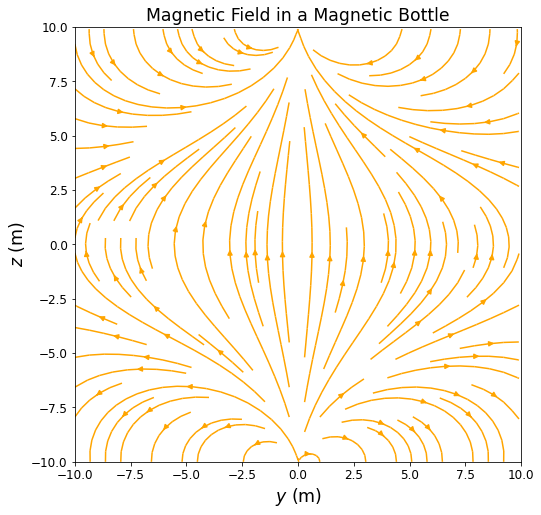

In [7]:
''' iterate through the grid and set magnetic field values at each point '''
for i in range(0, len_i): 
    for j in range(0, len_j):
        Bf[i,j] = bot_field(0.0, Y[i,j], Z[i,j]) 
        
plt.streamplot(Y,Z, Bf[:,:,1], Bf[:,:,2], color='orange') # plot the magnetic field
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)
plt.xlabel("$y$ (m)")
plt.ylabel("$z$ (m)")
plt.title("Magnetic Field in a Magnetic Bottle")

In [17]:
q = 2.0*q_p # charge of helium-4
m = 4.0*m_p # mass of helium-4
QoverM = q/m

dt = pow(10, -5) # timestep

t = np.arange(0.0, 1.0, dt) # array for times
rp = np.zeros((len(t), 3)) # array for position values
vp = np.zeros((len(t), 3)) # array for velocity values

v_o = 100 # set the initial velocity to 100 m/s
rp[0,:] = np.array([0.0, -5.0, 0.0]) # initialize the position to y=-5, 5m above the lower dipole
vp[0,:] = np.array([0.0, 0.0, v_o]) # initialize the velocity to be in the z-direction

In [18]:
''' Model the particle motion in the field at each time step (Forward Euler Method) '''
for it in np.arange(0, len(t)-1,1):
    Bp = bot_field(rp[it,0], rp[it, 1], rp[it,2]) # input the current particle position into to get the magnetic field
    Ap = QoverM * np.cross(vp[it,:], Bp)          # calculate the magnetic force on the particle
    vp[it+1] = vp[it] + dt*Ap                     # update the velocity of the particle based on this force
    rp[it+1] = rp[it] + dt*vp[it]                 # update the positron of the particle based on this velocity
    if (np.sqrt(np.sum(rp[it+1]**2)) > 20.0): # If the particle escapes (i.e. exceeds 20 m from origin), cease calculations
        break

Text(0.5, 1.0, 'Motion of Charged Particle in a Magnetic Bottle')

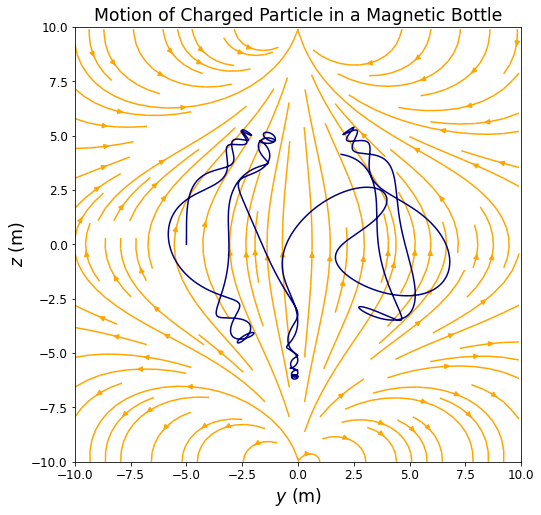

In [19]:
''' Plot the particle motion in the bottle '''
plt.streamplot(Y,Z, Bf[:,:,1], Bf[:,:,2], color="orange")
plt.plot(rp[:,1], rp[:,2], color='navy')
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)
plt.xlabel("$y$ (m)")
plt.ylabel("$z$ (m)")
plt.title("Motion of Charged Particle in a Magnetic Bottle")